In [28]:
import numpy as np

import pandas as pd
from pandas import set_option
from pandas import Series, DataFrame

import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn_extensions.extreme_learning_machines.elm import GenELMClassifier
from sklearn_extensions.extreme_learning_machines.random_layer import RBFRandomLayer, MLPRandomLayer

### 1. A primeira coisa que vamos fazer é ler o conjunto de dados usando a função read_csv() dos Pandas. 
##### a. Colocaremos esses dados em um DataFrame do Pandas, chamado "dataset", e nomearemos cada uma das colunas.

In [2]:
dataset = pd.read_csv('/Users/andrerodrigues/Google Drive/FIAP-MBA 8IA/009-Deep Learning & Reinforcement Learning/Fontes/mushrooms.csv')
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### 2. Pre-processamento de dados

In [3]:
def remove_features(lista_features):
    for i in lista_features:
        dataset_int.drop(i, axis=1, inplace=True)
    return 0

#### a. Como estamos construindo um modelo para classificar o cogumelo, nosso alvo será a variável "class" do dataframe dataset.
##### *Para ter certeza de que é uma variável binária, vamos usar a função countplot () do Seaborn.*

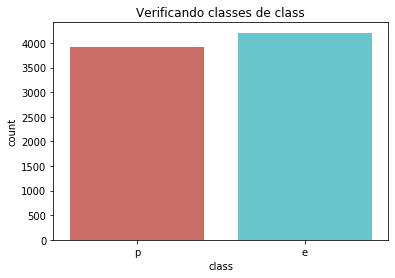

In [4]:
plot = sb.countplot(x='class',data=dataset, palette='hls')
plt.title("Verificando classes de class")
plt.show(plot)

##### Ok, agora veja que a variavel class é binária

### 3. Checking for missing values
##### *É fácil checar missing values usando método isnull() com o método sum(), o número retornado condiz com a quantidade True para o teste, ou seja, quantidade de valores nulos nas variaveis*

In [5]:
dataset.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [7]:
dataset.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [8]:
len(dataset.columns)

23

In [9]:
dataset.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

### 4. Ajustando os types do dataset
#### a. Vemos que o dataset foi todo construído com dtype = object. 
##### *Precisamos encontrar um modo de transformá-lo em variaveis quantitativas.Para isso vamos usar o LabelEncoder do SciKitLearn*

In [10]:
def enc_features(lista_features):
    enc = LabelEncoder()
    dataset_int = DataFrame(dataset)
    for i in lista_features:
        inteiros = enc.fit_transform(dataset[i])
        j = i + '_int'
        dataset_int[j] = inteiros
    return dataset_int

In [11]:
dataset_int = enc_features(dataset.columns)

In [12]:
dataset_int.dtypes

class                           object
cap-shape                       object
cap-surface                     object
cap-color                       object
bruises                         object
odor                            object
gill-attachment                 object
gill-spacing                    object
gill-size                       object
gill-color                      object
stalk-shape                     object
stalk-root                      object
stalk-surface-above-ring        object
stalk-surface-below-ring        object
stalk-color-above-ring          object
stalk-color-below-ring          object
veil-type                       object
veil-color                      object
ring-number                     object
ring-type                       object
spore-print-color               object
population                      object
habitat                         object
class_int                        int64
cap-shape_int                    int64
cap-surface_int          

In [13]:
obj_columns = dataset_int.select_dtypes(['object']).columns
obj_columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [14]:
remove_features(obj_columns)

0

In [15]:
dataset_int.dtypes

class_int                       int64
cap-shape_int                   int64
cap-surface_int                 int64
cap-color_int                   int64
bruises_int                     int64
odor_int                        int64
gill-attachment_int             int64
gill-spacing_int                int64
gill-size_int                   int64
gill-color_int                  int64
stalk-shape_int                 int64
stalk-root_int                  int64
stalk-surface-above-ring_int    int64
stalk-surface-below-ring_int    int64
stalk-color-above-ring_int      int64
stalk-color-below-ring_int      int64
veil-type_int                   int64
veil-color_int                  int64
ring-number_int                 int64
ring-type_int                   int64
spore-print-color_int           int64
population_int                  int64
habitat_int                     int64
dtype: object

### 5. Validando independencia entre as variáveis

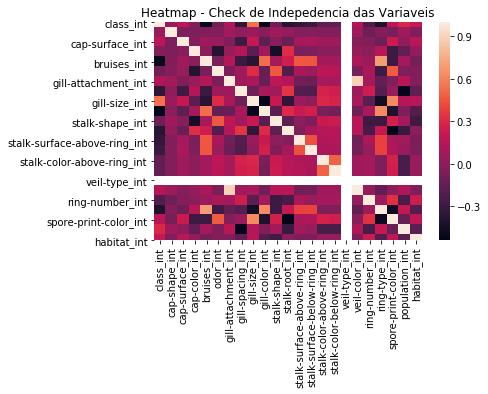

In [16]:
plot1 = sb.heatmap(dataset_int.corr()) 
print('\n')
plt.title("Heatmap - Check de Indepedencia das Variaveis")
plt.show(plot1)

#### Vemos que a variável veil-type_int não agrega nenhuma informação e, por isso, vamos remove-la:

In [17]:
dataset_int.drop('veil-type_int', axis=1, inplace=True)
dataset_int

,class_int,cap-shape_int,cap-surface_int,cap-color_int,bruises_int,odor_int,gill-attachment_int,gill-spacing_int,gill-size_int,gill-color_int,...,stalk-surface-above-ring_int,stalk-surface-below-ring_int,stalk-color-above-ring_int,stalk-color-below-ring_int,veil-color_int,ring-number_int,ring-type_int,spore-print-color_int,population_int,habitat_int
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


In [18]:
set_option('precision', 2)
corr = dataset_int.corr(method='pearson')
corr

,class_int,cap-shape_int,cap-surface_int,cap-color_int,bruises_int,odor_int,gill-attachment_int,gill-spacing_int,gill-size_int,gill-color_int,...,stalk-surface-above-ring_int,stalk-surface-below-ring_int,stalk-color-above-ring_int,stalk-color-below-ring_int,veil-color_int,ring-number_int,ring-type_int,spore-print-color_int,population_int,habitat_int
class_int,1.00,5.30e-02,0.18,-3.14e-02,-5.02e-01,-0.09,0.13,-0.35,0.54,-5.31e-01,...,-0.33,-0.30,-1.54e-01,-1.47e-01,1.45e-01,-2.14e-01,-0.41,1.72e-01,0.30,2.17e-01
cap-shape_int,0.05,1.00e+00,-0.05,-4.82e-02,-3.54e-02,-0.02,0.08,0.01,0.05,-6.04e-03,...,-0.03,-0.03,-3.17e-02,-3.04e-02,7.26e-02,-1.07e-01,-0.03,-7.34e-02,0.06,-4.22e-02
cap-surface_int,0.18,-5.05e-02,1.00,-1.94e-02,7.02e-02,0.05,-0.03,-0.28,0.21,-1.61e-01,...,0.09,0.11,6.61e-02,6.89e-02,-1.66e-02,-2.61e-02,-0.11,2.30e-01,0.02,1.64e-01
cap-color_int,-0.03,-4.82e-02,-0.02,1.00e+00,-7.64e-04,-0.39,0.04,0.14,-0.17,8.47e-02,...,-0.06,-0.05,2.36e-03,8.06e-03,3.61e-02,-5.82e-03,0.16,-2.94e-01,-0.14,3.39e-02
bruises_int,-0.50,-3.54e-02,0.07,-7.64e-04,1.00e+00,-0.06,0.14,-0.30,-0.37,5.27e-01,...,0.46,0.46,8.35e-02,9.29e-02,1.20e-01,5.68e-02,0.69,-2.85e-01,0.09,-7.51e-02
odor_int,-0.09,-2.19e-02,0.05,-3.87e-01,-6.18e-02,1.00,-0.06,0.06,0.31,-1.29e-01,...,0.12,0.06,1.75e-01,1.69e-01,-5.77e-02,1.12e-01,-0.28,4.69e-01,-0.04,-2.66e-02
gill-attachment_int,0.13,7.89e-02,-0.03,4.14e-02,1.37e-01,-0.06,1.00,0.07,0.11,-1.29e-01,...,-0.09,-0.12,9.93e-02,9.72e-02,8.98e-01,9.32e-02,-0.15,-2.95e-02,0.17,-3.03e-02
gill-spacing_int,-0.35,1.32e-02,-0.28,1.44e-01,-2.99e-01,0.06,0.07,1.00,-0.11,1.00e-01,...,-0.21,-0.21,2.75e-01,2.54e-01,7.34e-02,2.43e-01,-0.20,4.73e-02,-0.53,-1.55e-01
gill-size_int,0.54,5.41e-02,0.21,-1.69e-01,-3.70e-01,0.31,0.11,-0.11,1.00,-5.17e-01,...,0.06,0.01,2.97e-01,2.79e-01,1.04e-01,-1.71e-01,-0.46,6.23e-01,0.15,1.61e-01
gill-color_int,-0.53,-6.04e-03,-0.16,8.47e-02,5.27e-01,-0.13,-0.13,0.10,-0.52,1.00e+00,...,0.22,0.26,-5.83e-02,-7.48e-02,-9.76e-02,9.61e-02,0.63,-4.16e-01,-0.03,-2.03e-01


In [19]:
to_del = corr[abs(corr) > 0.9].fillna(0)
to_del

,class_int,cap-shape_int,cap-surface_int,cap-color_int,bruises_int,odor_int,gill-attachment_int,gill-spacing_int,gill-size_int,gill-color_int,...,stalk-surface-above-ring_int,stalk-surface-below-ring_int,stalk-color-above-ring_int,stalk-color-below-ring_int,veil-color_int,ring-number_int,ring-type_int,spore-print-color_int,population_int,habitat_int
class_int,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cap-shape_int,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cap-surface_int,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cap-color_int,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bruises_int,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
odor_int,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gill-attachment_int,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gill-spacing_int,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gill-size_int,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gill-color_int,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
excl = []
for i in range(len(corr)):
    for j in range(len(corr.columns)):
        if ((corr.iloc[i,j] >= 0.9 or corr.iloc[i,j] <= -0.9) and i != j and j!=0):
            excl.append(j)
excl

[]

In [21]:
np.unique(excl)

array([], dtype=float64)

##### *Agora temos um conjunto de dados com todas as variáveis no formato correto!*

### 6. Etapa de Treinamento do modelo

#### Separar o conjunto em variavel resposta e variaveis de treinamento

In [26]:
X = dataset_int.iloc[:,1:].values
y = dataset_int.iloc[:,0].values
print("Shape de X:", X.shape)
print("Shape de y:", y.shape)

Shape de X: (8124, 21)
Shape de y: (8124,)


In [29]:
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)
 
nh = 10

#### Primeiro EML baseado em MPL com função de ativação sigmoid


In [30]:
srhl_sigmoid = MLPRandomLayer(n_hidden=nh, activation_func='sigmoid')
elm_model = GenELMClassifier(hidden_layer=srhl_sigmoid)
elm_model.fit(X_train, y_train)
score = elm_model.score(X_test, y_test)
print(score)

0.8408531583264971


#### EML baseado em rede RBF


In [31]:
srhl_rbf = RBFRandomLayer(n_hidden=nh*2, rbf_width=0.1, random_state=0)
elm_model = GenELMClassifier(hidden_layer=srhl_rbf)
elm_model.fit(X_train, y_train)
score = elm_model.score(X_test, y_test)
print(score)

0.881870385561936
